In [ ]:
import pandas as pd


df = pd.read_csv("../data/raw_analyst_ratings.csv", header=None)   

df.columns = ['number', 'headline', 'url', 'publisher', 'date', 'stock']

df['headline'] = df['headline'].astype(str).str.strip()
df['url'] = df['url'].astype(str).str.strip()
df['publisher'] = df['publisher'].astype(str).str.strip().str.title()
df['stock'] = df['stock'].astype(str).str.strip().str.upper()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure 'number' is numeric
df['number'] = pd.to_numeric(df['number'], errors='coerce')

# Drop rows with missing values (optional: you can also choose to fill them)
df = df.dropna()

# Drop duplicates
df = df.drop_duplicates()

# Final check
print(df.info())
print(df.head())

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#headline length
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [21]:
#top 10 publishers
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))  # Top 10 publishers


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
Etf Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


<Axes: title={'center': 'Articles Over Time'}, xlabel='date'>

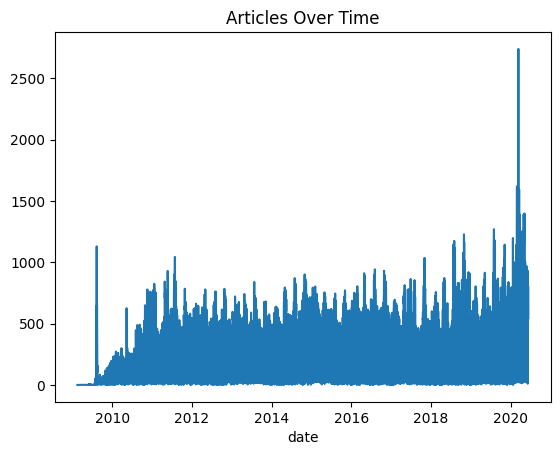

In [22]:
df['date'] = pd.to_datetime(df['date'], utc=True)
daily_articles = df.groupby(df['date'].dt.date).size()
daily_articles.plot(kind='line', title='Articles Over Time')
